# Preparation

In [3]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [1]:
# !pip install --upgrade tensorflow

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.mixed_precision import set_global_policy

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
# !python -m pip install pyyaml==5.1
# import sys, os, distutils.core
# # Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# # See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
# !git clone 'https://github.com/facebookresearch/detectron2'
# dist = distutils.core.run_setup("./detectron2/setup.py")
# !python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
# sys.path.insert(0, os.path.abspath('./detectron2'))

# # Properly install detectron2. (Please do not install twice in both ways)
# # !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pathlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

Data source: https://www.kaggle.com/datasets/catarinaantelo/portuguese-meals?resource=download

I access it through my drive

In [5]:
!unzip '/content/drive/MyDrive/FoodRecog/archive (1).zip'

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import cv2
import imghdr

C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_13448\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## Using keras to make pipeline

### CNN pipeline

make pipeline

In [49]:
dataset = tf.keras.utils.image_dataset_from_directory('./portuguese_food_2')

Found 6726 files belonging to 23 classes.


make pipeline itterable (accessible)

In [8]:
datsetitter = dataset.as_numpy_iterator()

access pipeline

In [9]:
batch = datsetitter.next()

visualize

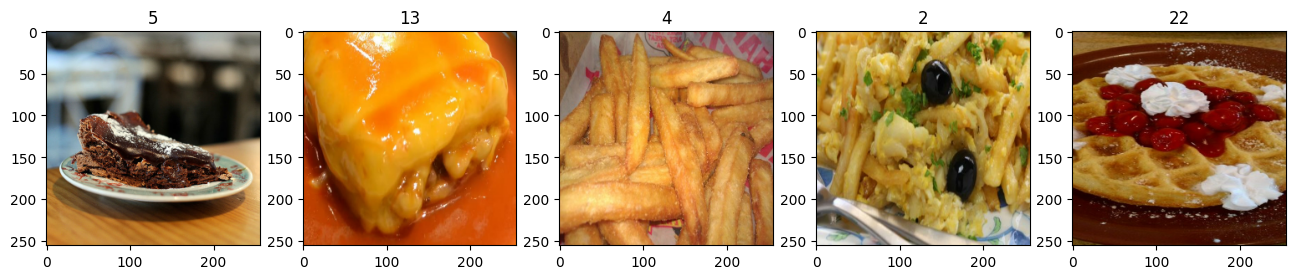

In [10]:
fig, ax = plt.subplots(ncols = 5, figsize = (16, 16))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

### RNN pipeline

In [11]:
# Define data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

batch_size = 32
train_lstm = train_datagen.flow_from_directory(
    './portuguese_food_2',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_lstm = val_datagen.flow_from_directory(
    './portuguese_food_2',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 5389 images belonging to 23 classes.
Found 1337 images belonging to 23 classes.


# Preprocessing

## Scaling data (speedup data load)

In [50]:
scaled = dataset.map(lambda x,y: (x/255, y))

In [51]:
batch = scaled.as_numpy_iterator().next()

In [52]:
batch

(array([[[[3.92156869e-01, 1.88235298e-01, 0.00000000e+00],
          [3.76470596e-01, 1.68627456e-01, 0.00000000e+00],
          [3.71936262e-01, 1.64093137e-01, 0.00000000e+00],
          ...,
          [2.52328426e-01, 1.07230395e-01, 5.26960799e-03],
          [2.62745112e-01, 1.07843138e-01, 1.96078443e-03],
          [2.74509817e-01, 1.13725491e-01, 3.92156886e-03]],
 
         [[3.88480395e-01, 1.84558824e-01, 0.00000000e+00],
          [3.80147070e-01, 1.72303915e-01, 0.00000000e+00],
          [3.65196079e-01, 1.57352939e-01, 0.00000000e+00],
          ...,
          [2.47058824e-01, 1.01960786e-01, 0.00000000e+00],
          [2.58700967e-01, 1.03799023e-01, 0.00000000e+00],
          [2.70833343e-01, 1.10049017e-01, 2.45098054e-04]],
 
         [[3.88235301e-01, 1.84313729e-01, 0.00000000e+00],
          [3.80392164e-01, 1.72549024e-01, 0.00000000e+00],
          [3.62500012e-01, 1.54656857e-01, 0.00000000e+00],
          ...,
          [2.43137255e-01, 9.80392173e-02, 0.0000

In [53]:
print(batch[0].max())
print(batch[0].min())

1.0
0.0


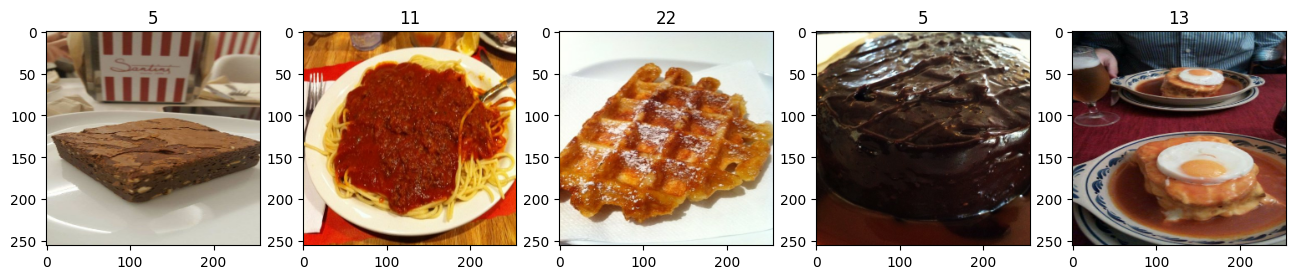

In [16]:
fig, ax = plt.subplots(ncols = 5, figsize = (16, 16))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

## train test split

In [17]:
len(scaled)

211

In [18]:
train_size = int(len(scaled) *.7)
val_size = int(len(scaled) *.2)+1
test_size = int(len(scaled) *.1)

print(train_size + val_size + test_size)

211


In [19]:
train = dataset.take(train_size)
val = dataset.skip(train_size).take(val_size)
test = dataset.skip(train_size + val_size).take(test_size)

In [20]:
dataset.class_names

['aletria',
 'arroz_cabidela',
 'bacalhau_bras',
 'bacalhau_natas',
 'batatas_fritas',
 'bolo_chocolate',
 'cachorro',
 'caldo_verde',
 'cozido_portuguesa',
 'croissant',
 'donuts',
 'esparguete_bolonhesa',
 'feijoada',
 'francesinha',
 'gelado',
 'hamburguer',
 'jardineira',
 'nata',
 'ovo',
 'pasteis_bacalhau',
 'pizza',
 'tripas_moda_porto',
 'waffles']

In [21]:
trainbatch = train.as_numpy_iterator().next()
trainbatch[0].shape

(32, 256, 256, 3)

# Modeling

In [22]:
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Embedding
from keras.layers import GlobalAveragePooling2D
from keras.layers import Reshape
from keras.layers import Bidirectional

In [23]:
!mkdir logs
logdir = '/logs'

A subdirectory or file logs already exists.


In [24]:
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

## CNN

In [91]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=23,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
# resnet_model.add(Flatten())
# resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(23, activation='softmax'))

In [92]:
resnet_model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [93]:
resnet_model.compile(optimizer=Adam(learning_rate=1e-4),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [94]:
resnethist = resnet_model.fit(train, epochs = 10, validation_data=val, callbacks=[tensor_callback])

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.1587 - loss: 3.0071 - val_accuracy: 0.5589 - val_loss: 1.7272
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.5939 - loss: 1.5705 - val_accuracy: 0.7304 - val_loss: 1.1531
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.7397 - loss: 1.0704 - val_accuracy: 0.7798 - val_loss: 0.8995
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.8059 - loss: 0.8234 - val_accuracy: 0.8241 - val_loss: 0.7338
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.8511 - loss: 0.6641 - val_accuracy: 0.8467 - val_loss: 0.6393
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.8733 - loss: 0.5739 - val_accuracy: 0.8561 - val_loss: 0.5771
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.8964 - loss: 0.4983 - val_accuracy: 0.8714 - val_loss: 0.5227
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.9041 - loss: 0.4387 - val_accu

## RNN - LSTM

Because LSTM is actually used for sequential data CNN is needed to make the input file

In [100]:
image_width, image_height, color_channels = 256, 256, 3
num_classes = 23 

# Define the CNN model for feature extraction
cnn_model = Sequential()
cnn_model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(image_width, image_height, color_channels))) # Convolutional layer
cnn_model.add(MaxPooling2D(2, 2)) # Pooling layer
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(GlobalAveragePooling2D())  # Extract features using global average pooling
cnn_model.add(Reshape((1, 128)))

# 1 CNN layer consist of 1 convo and 1 maxpool so total 5 cnn layer
# Define the combined CNN-LSTM model
lstm_model = Sequential()
lstm_model.add(cnn_model)  # Add the pre-built CNN model
lstm_model.add(LSTM(units=64, activation='relu', return_sequences=True))
lstm_model.add(Bidirectional(LSTM(units=128, activation='relu', return_sequences=True)))
lstm_model.add(LSTM(units=128, activation='relu', return_sequences=True))
lstm_model.add(LSTM(units=65, activation='relu', return_sequences=True))
lstm_model.add(Dense(256, activation='relu'))
lstm_model.add(Flatten())
lstm_model.add(Dense(num_classes, activation='softmax'))

# Compile the combined model
lstm_model.compile(optimizer=Adam(learning_rate=1e-4),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Print model summary
lstm_model.summary()

# Train the model
epochs = 10
history = lstm_model.fit(
    train_lstm,  # Steps per epoch for training data
    validation_data = val_lstm,
    epochs=epochs
)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_22 (Sequential)      │ ?                      │       188,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,192 (735.12 KB)

 Trainable params: 188,192 (735.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.0707 - loss: 3.0953 - val_accuracy: 0.0696 - val_loss: 2.8644
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.0791 - loss: 2.8733 - val_accuracy: 0.0875 - val_loss: 2.8409
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.0979 - loss: 2.8446 - val_accuracy: 0.0785 - val_loss: 2.8325
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.0981 - loss: 2.8315 - val_accuracy: 0.0890 - val_loss: 2.8174
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.0957 - loss: 2.8132 - val_accuracy: 0.1092 - val_loss: 2.8211
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.1001 - loss: 2.7955 - val_accuracy: 0.1085 - val_loss: 2.7926
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.1061 - loss: 2.8143 - val_accuracy: 0.1227 - val_loss: 2.7633
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.1425 - loss: 2.7484 - val_accu

## ANN

In [30]:
import tensorflow.keras

In [77]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [256, 256, 3]),
    keras.layers.Dense(100, activation = 'relu'),
    # keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    # keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(23, activation = 'softmax')
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5), metrics = ['accuracy'])

In [103]:
newdat = scaled.unbatch()

In [120]:
newtrain = scaled.take(train_size)
newval = scaled.skip(train_size).take(val_size)
newtest = scaled.skip(train_size + val_size).take(test_size)

In [119]:
annhist = model.fit(newtrain, validation_data=newval, epochs = 100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=True
  • mask=None

# Evaluation

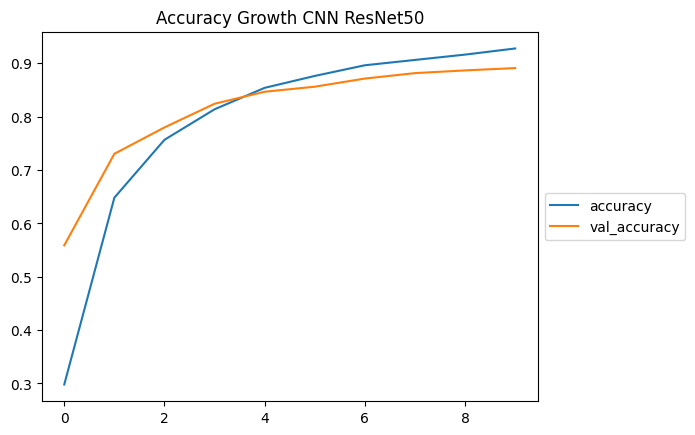

In [95]:
fig = plt.figure()
plt.plot(resnethist.history['accuracy'], label='accuracy')
plt.plot(resnethist.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy Growth CNN ResNet50")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

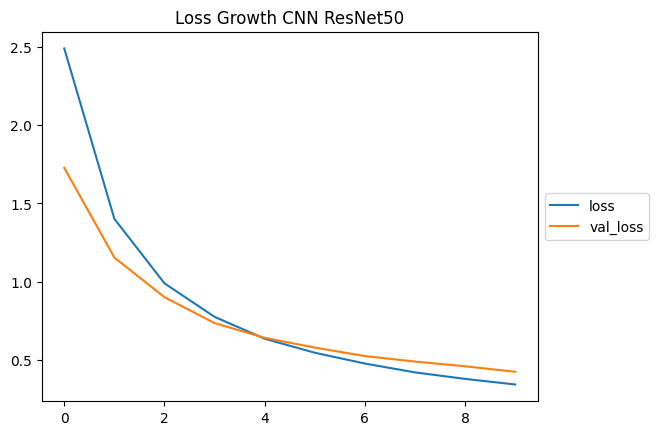

In [96]:
fig = plt.figure()
plt.plot(resnethist.history['loss'], label='loss')
plt.plot(resnethist.history['val_loss'], label='val_loss')
plt.title("Loss Growth CNN ResNet50")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

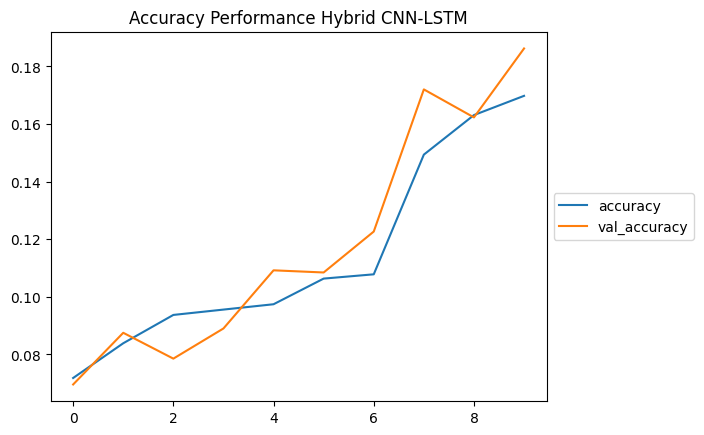

In [101]:
fig = plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy Performance Hybrid CNN-LSTM")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

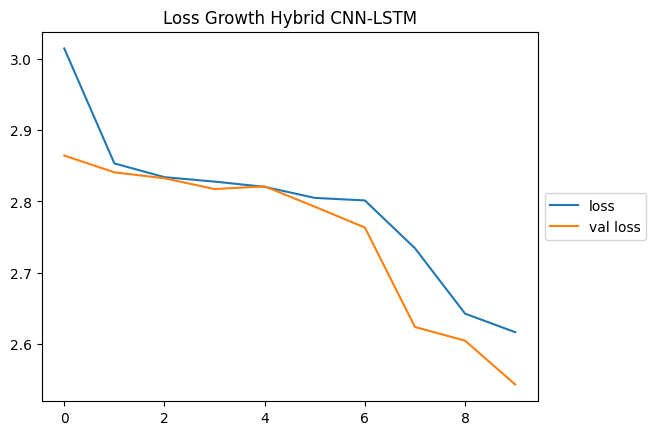

In [102]:
fig = plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss Growth Hybrid CNN-LSTM")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

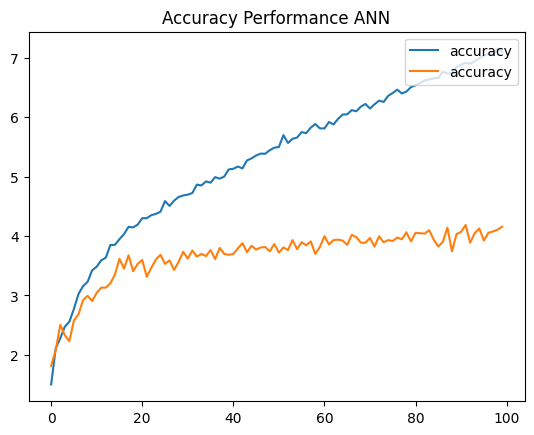

In [83]:
fig = plt.figure()
plt.plot([x * 10 for x in annhist.history['accuracy']], label='accuracy')
plt.plot([x * 10 for x in annhist.history['val_accuracy']], label='accuracy')
plt.title("Accuracy Performance ANN")
plt.legend(loc='upper right')
plt.show()

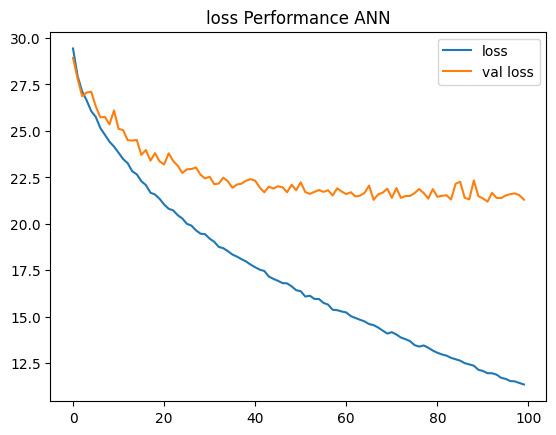

In [84]:
fig = plt.figure()
plt.plot([x * 10 for x in annhist.history['loss']], label='loss')
plt.plot([x * 10 for x in annhist.history['val_loss']], label='val loss')
plt.title("loss Performance ANN")
plt.legend(loc='upper right')
plt.show()